In [1]:
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
import Reader
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from matplotlib import colormaps
cm = colormaps['viridis']
from scipy.special import erfc

In [2]:
file = Reader.CustomHDF5Reader(media+'mu5e_2'+'.hdf')
file.open()
print(file.list_measurements(file.list_groups()[0]))
file.close()

['Check_Time', 'Coarse_Time', 'Entropy', 'ISF', 'NRG', 'PCF', 'Time_shift', 'cluster', 'moves_1']


In [2]:
density = 'mu5e_2_'
Names = ['N2','N5','N10','N50']
pcfs = list()
for name in Names:
    print(name)
    pcfs.append(Data_Treatement(media+density+name+'.hdf',data_type='PCF'))
media_2 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
file_2 = "E-15_N100_ell2E3_kdiffE-4.hdf"
pcfs.append(Data_Treatement(media_2+file_2,data_type='PCF'))


for pcf in pcfs:    
    pcf.average(log_scale=False,num_bins=100)


N2
N5
N10
N50


In [3]:
Peq = lambda r,ell_tot, : 3/(2*np.pi*ell_tot*r)*erfc(np.sqrt(3/(2*ell_tot))*r)

In [27]:
pcfs[0].attributes

{'ell_tot': 20,
 'Energy': -15,
 'kdiff': 0.001,
 'seed': 524288,
 'Nlinker': 2,
 'dimension': 3,
 'step_tot': 10000,
 'check_steps': 1000,
 'coarse_grained_step': 10,
 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (20, 30)), 'NRG': (<class 'Energy.NRG'>, ())}",
 'MSD_args': {'NRG': True,
  'Cluster': True,
  'MSD': False,
  'ISF': True,
  'PCF': True,
  'PCF_L': False},
 'ISF_arg': 2.0}

[10.0, 20.0, 20.0, 20.0, 20.0]


(1e-06, 0.1)

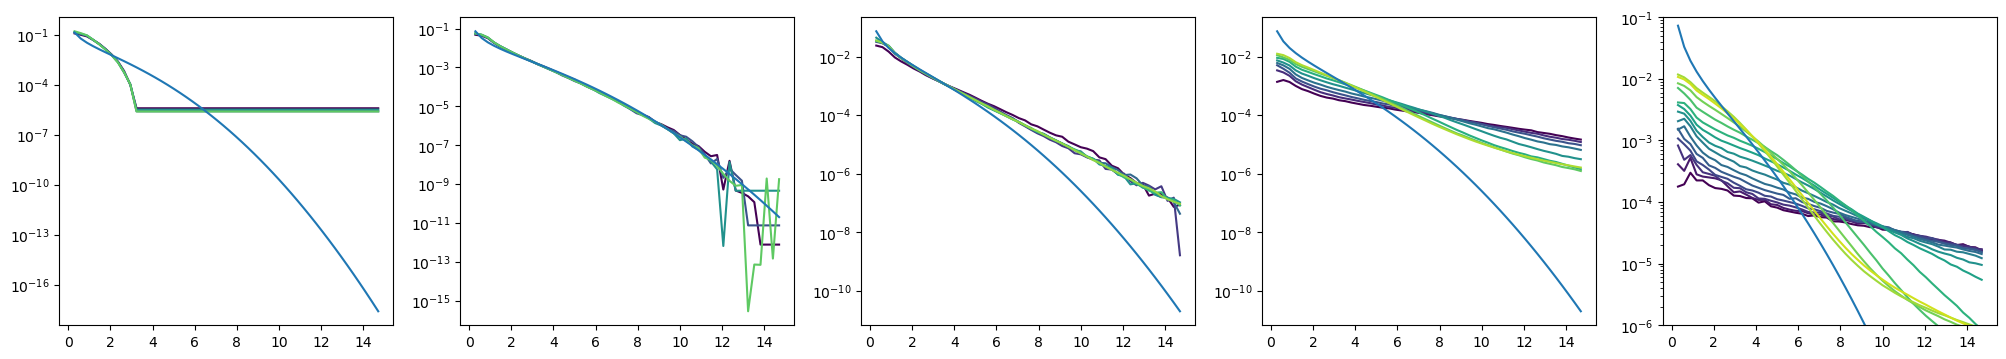

In [4]:
ell = [pcf.attributes['ell_tot']/pcf.attributes['Nlinker'] for pcf in pcfs]
print(ell)
ncol = pcfs.__len__()
fig,ax = plt.subplots(figsize=(5*ncol,4),ncols=ncol)
i=0
x = np.linspace(0.1,15,100)
for pcf in pcfs:
    n=0
    for x,data in zip(pcf.binned_time,pcf.average_data):
        ax[i].plot(x,data,color = cm(n/pcf.average_data.__len__()))
        n+=1
    ax[i].plot(x,Peq(x,ell[i]))
    ax[i].set_yscale('log')
        
    i+=1
plt.ylim(10**-6,10**-1)

In [ ]:
Names = ['N5','N50']
nrgs = list()
for name in Names:
    print(name)
    nrgs.append(Data_Treatement(media+density+name+'.hdf',data_type='NRG'))
for nrg in nrgs:
    nrg.average(log_scale=False,num_bins=100)

/tmp/ipykernel_54566/4282593399.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


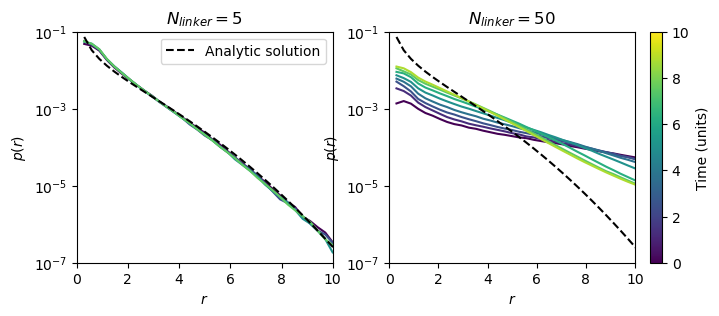

In [69]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

norm = mcolors.Normalize(vmin=0, vmax=10)


ncol = 2
fig,ax = plt.subplots(figsize=(4*ncol,3),ncols=ncol,gridspec_kw={'width_ratios': [1, 1.2]})

x = np.linspace(0.1,15,100)

pcf1 = pcfs[1]
pcf2 = pcfs[3]
viridis = cm.get_cmap('viridis')
n=0
for x,data in zip(pcf1.binned_time,pcf1.average_data):
    ax[0].plot(x,data,color = viridis(n/pcf1.average_data.__len__()))
    n+=1
ax[0].plot(x,Peq(x,10**2/5),color='black',linestyle='--',label='Analytic solution')
ax[0].set_yscale('log')
ax[0].set_ylim(10**-7,10**-1)
ax[0].set_xlim(0,10)
ax[0].set_title('$N_{linker} = 5$')
ax[0].yaxis.set_minor_locator(plt.NullLocator())
ax[0].set_yticks([10**-7,10**-5,10**-3,10**-1])
ax[0].legend()
ax[0].set_ylabel(r'$p(r)$')
ax[0].set_xlabel(r'$r$')


n=0
for x,data in zip(pcf2.binned_time,pcf2.average_data):
    ax[1].plot(x,data,color = viridis(n/pcf2.average_data.__len__()))
    n+=1
ax[1].plot(x,Peq(x,10**3/50),color='black',linestyle='--',label='Analytic solution')
#ax[1].plot(x,Peq(x,10**3/25),color='black',linestyle=':')
ax[1].set_yscale('log')
ax[1].set_ylim(10**-7,10**-1)
ax[1].set_xlim(0,10)
ax[1].set_title('$N_{linker} = 50$')
#ax[1].legend()#loc='upper left', bbox_to_anchor=(1.05, 1))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].set_yticks([10**-7,10**-5,10**-3,10**-1])

ax[1].set_ylabel(r'$p(r)$')
ax[1].set_xlabel(r'$r$')

# Add a colorbar to the figure
sm = cm.ScalarMappable(cmap=viridis, norm=norm)  # Create a ScalarMappable
sm.set_array([])  # We don't need any actual data here, just the color scale

# Add the colorbar to the plot
fig.colorbar(sm, ax=ax[1], label='Time (units)')  # Adjust the label as needed

#plt.savefig('pcf.svg',transparent=True,bbox_inches='tight')